## 使用napari和magicgui进行交互式参数调整
处理图像时的一个常见任务是手动调整参数，直到分割算法在给定数据集上运行良好。[napari](https://napari.org)查看器和[magicgui](https://napari.org/magicgui/)提供了自动构建用户界面的可能性，用户可以在其中调整参数并立即看到相应分割的效果。本笔记本演示了如何通过一个简单的执行图像处理的Python函数来实现这一点。

In [1]:
# Inspired by
# https://github.com/pr4deepr/pyclesperanto_prototype/blob/master/napari_clij_widget.py
import napari
import pyclesperanto_prototype as cle
from magicgui import magicgui
from napari.types import ImageData, LabelsData

我们的起点是一个实现特定图像处理工作流程的函数。在这个例子中，我们使用高斯滤波器模糊图像，使用[Otsu方法](https://ieeexplore.ieee.org/document/4310076)进行阈值处理，并应用连通组件标记来区分对象并给它们贴标签。

In [2]:
@magicgui(auto_call=True)
def process_image(image_input: ImageData, sigma: float = 2) -> LabelsData:
    if input is not None:
        # process the image
        blurred = cle.gaussian_blur(image_input, sigma_x=sigma, sigma_y=sigma)
        binary = cle.threshold_otsu(blurred)
        labels = cle.connected_components_labeling_box(binary)

        return labels

我们还需要一个示例图像来演示这个过程。

In [3]:
# load data
from skimage.io import imread
image = imread('https://samples.fiji.sc/blobs.png')

接下来，我们启动napari查看器，添加原始图像，并附加一个自动生成的用户界面，一个停靠小部件，允许我们配置上面提供的函数的参数。此外，我们还对查看器进行截图。

If you want to compute separable approximations, please install it with
pip install scikit-tensor-py3


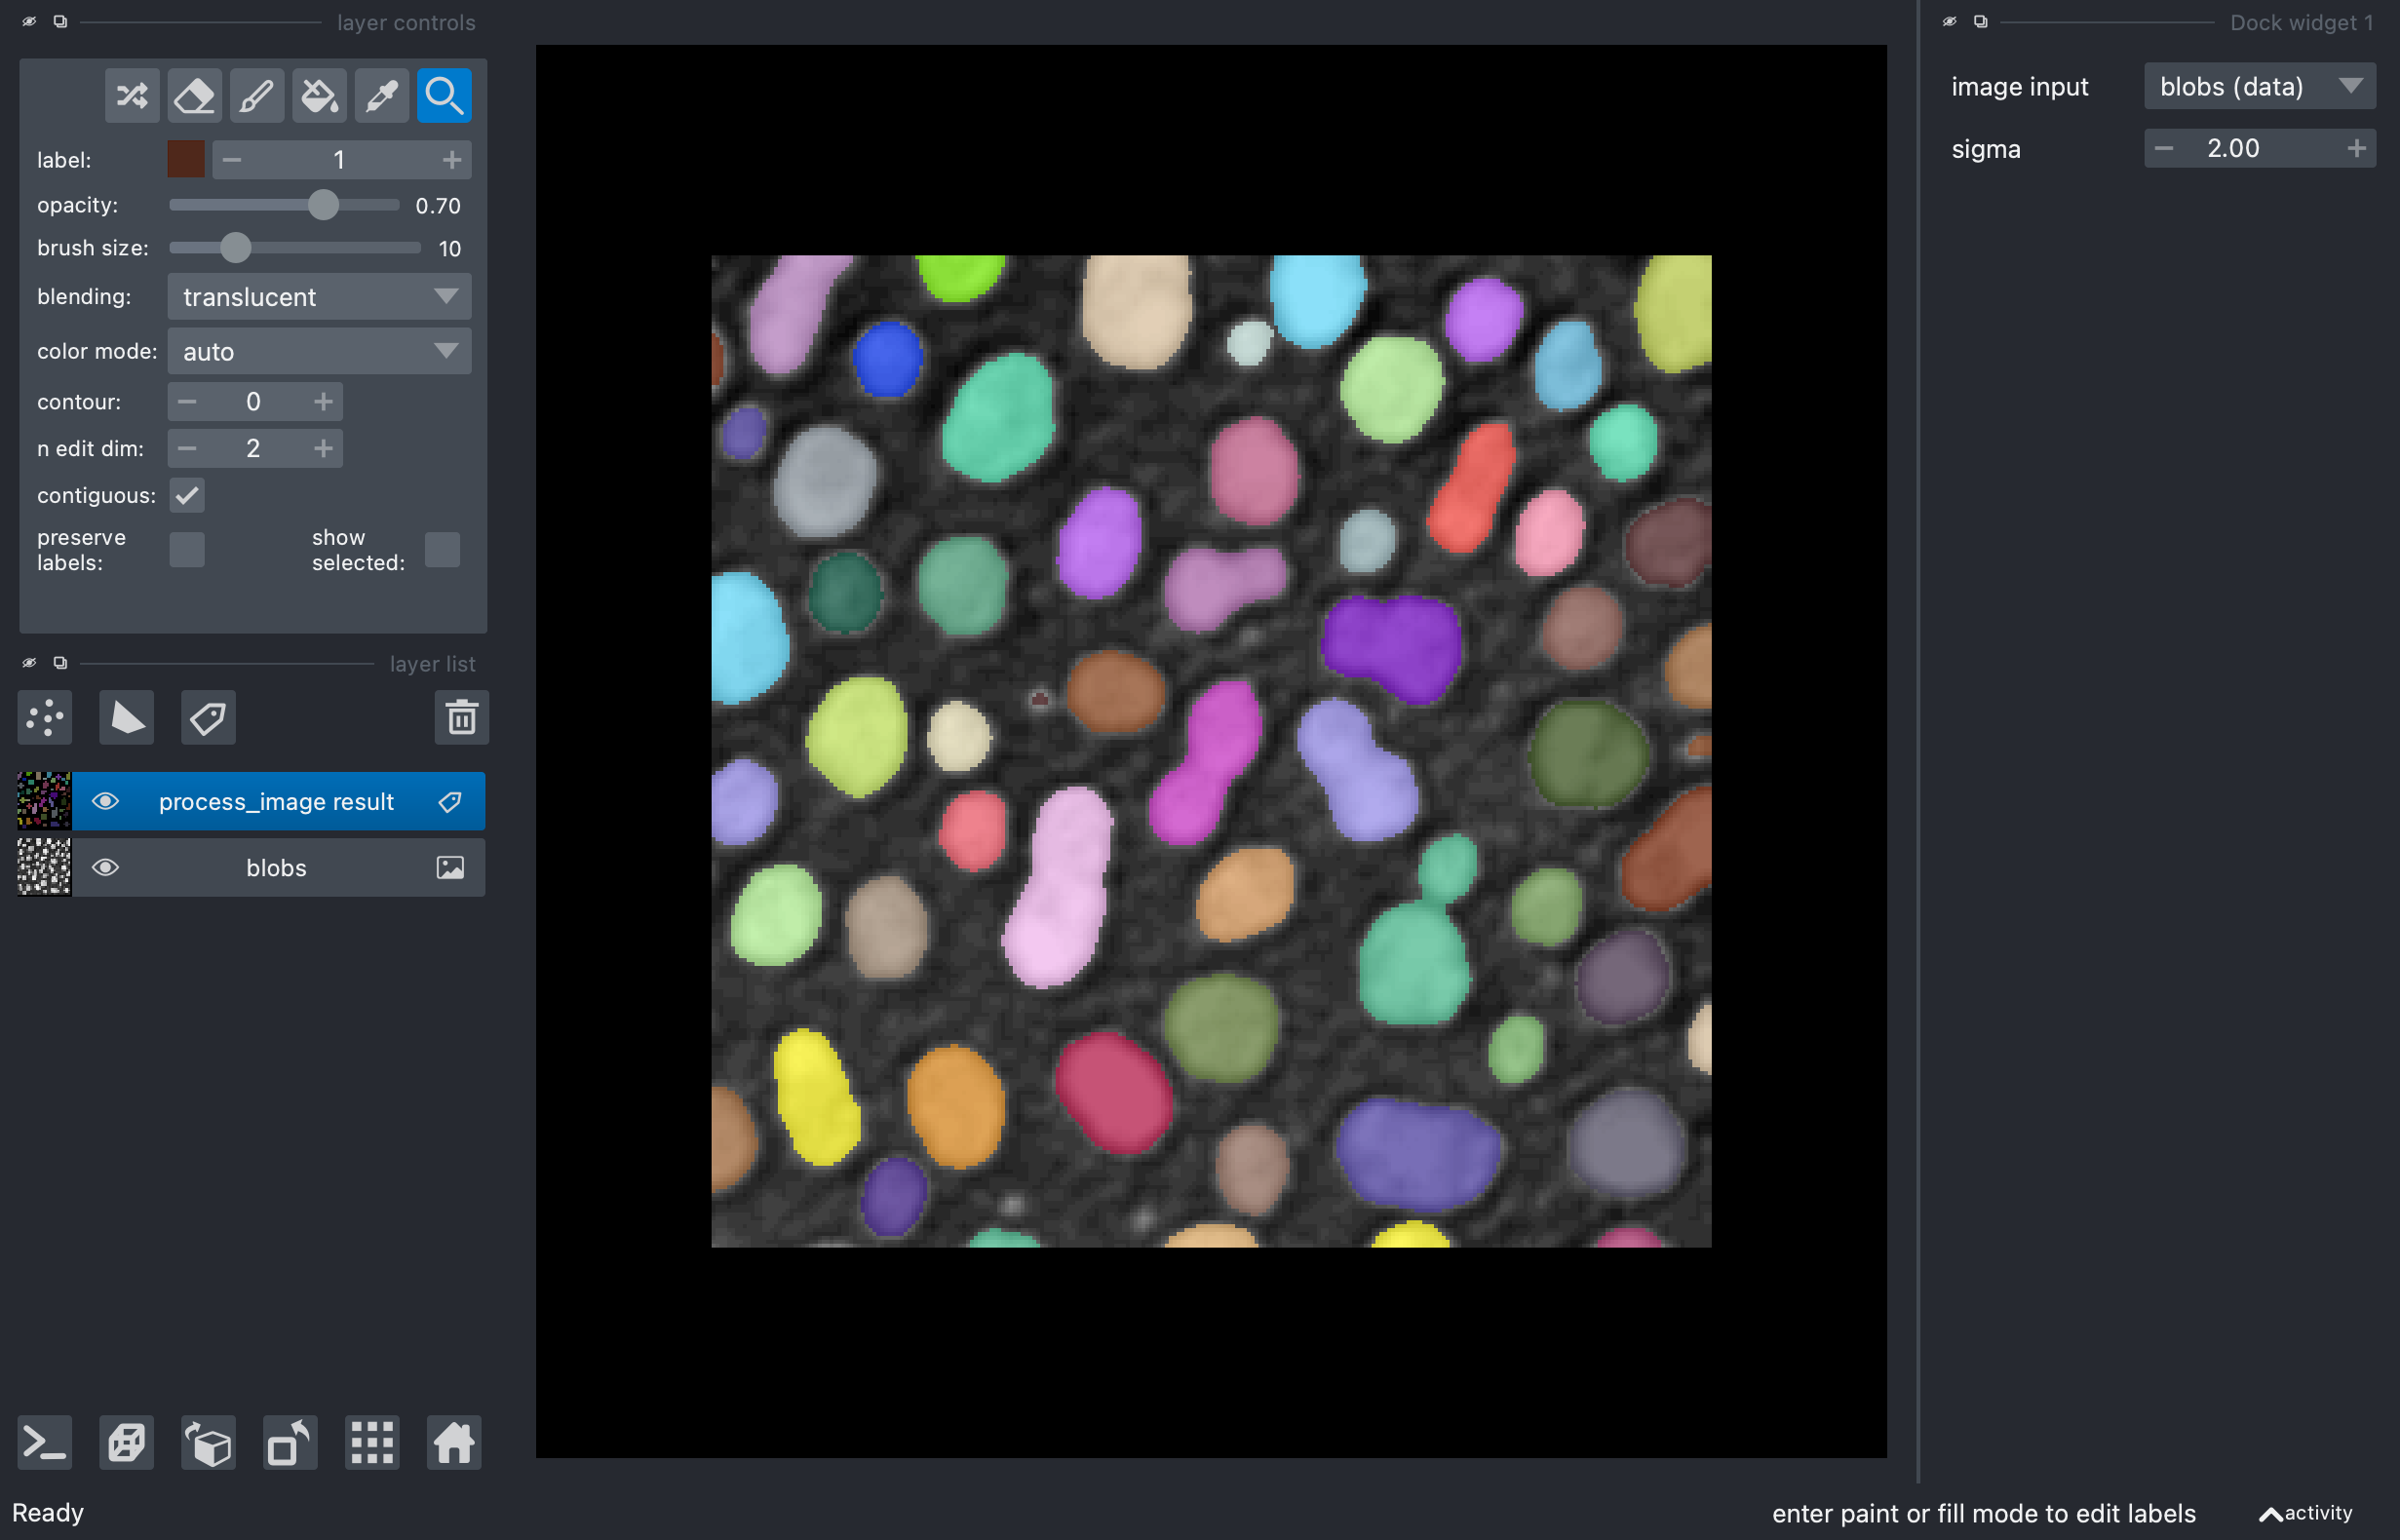

In [4]:
# start up napari
viewer = napari.Viewer()
viewer.add_image(image, name='blobs')

# generate a Graphical User Interface from the function above magically
viewer.window.add_dock_widget(process_image)

# take a screenshot
napari.utils.nbscreenshot(viewer)